Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data collection

In [ ]:
wine_data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
# printing the first five row
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#printing the last five row
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# printing the shape of the dataset
wine_data.shape

(1599, 12)

In [ ]:
# checking for the missing value
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and visualization

In [ ]:
# printing some statical measures
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


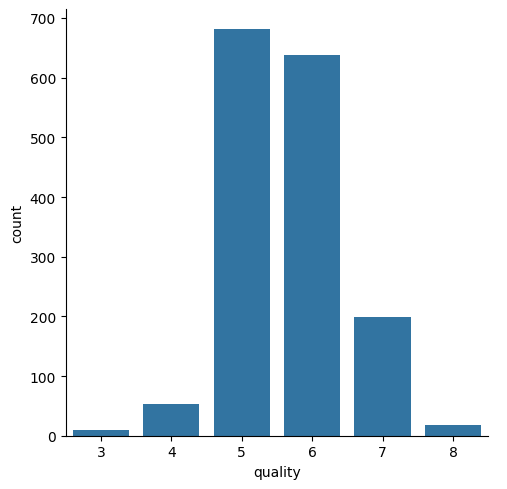

In [ ]:
# number of values for each Quality
sns.catplot(x='quality',data = wine_data,kind= 'count')

In [ ]:
# checking the relation between the quality and other features og the dataset

<Axes: xlabel='volatile acidity', ylabel='count'>

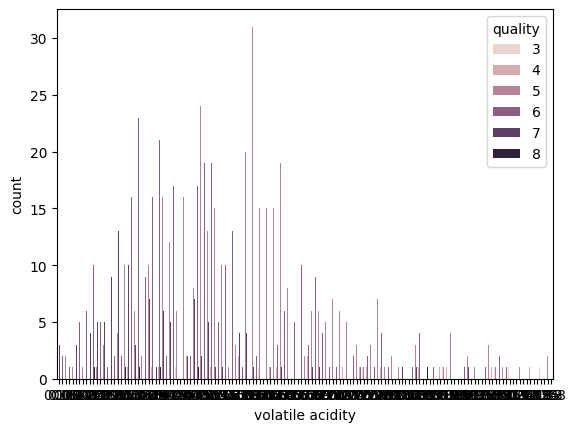

In [ ]:
# volatile acidity vs quality
sns.countplot(x ='volatile acidity',hue = 'quality',data = wine_data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

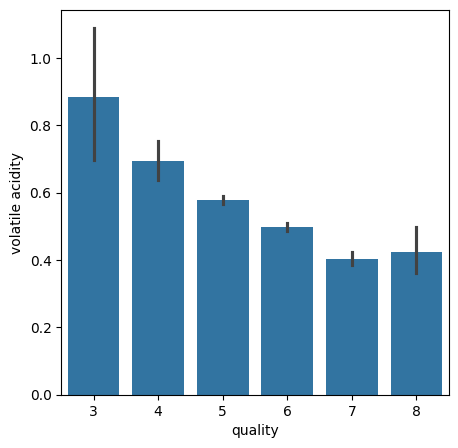

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'volatile acidity',data = wine_data)

# quality and volatile acidity are inversly praportional

<Axes: xlabel='quality', ylabel='citric acid'>

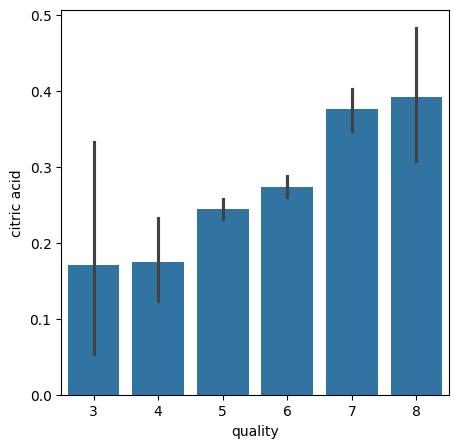

In [ ]:
# citric acid content and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'citric acid',data = wine_data)

# directly praportional

<Axes: xlabel='quality', ylabel='sulphates'>

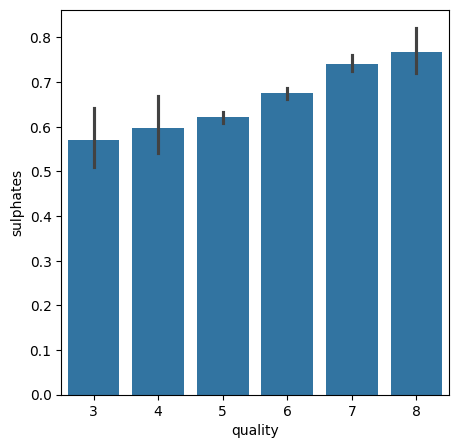

In [ ]:
# sulphates and quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

# directly praportional

<Axes: xlabel='quality', ylabel='pH'>

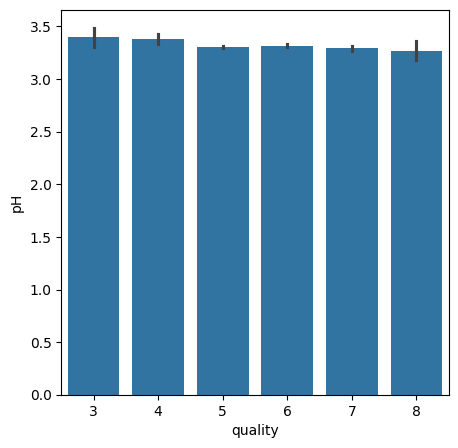

In [ ]:
# pH and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'pH', data = wine_data)

<Axes: xlabel='quality', ylabel='alcohol'>

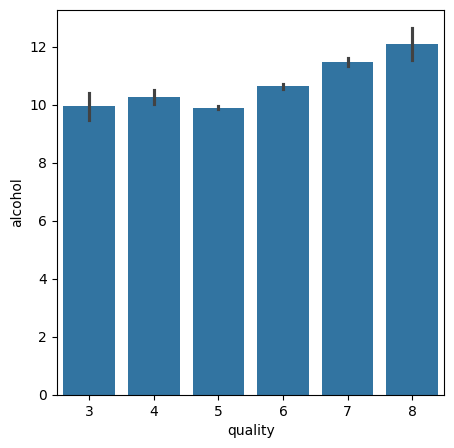

In [ ]:
# alcohol and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'alcohol', data = wine_data)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

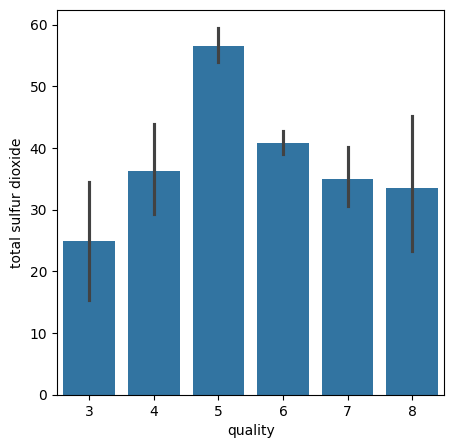

In [ ]:
# total sulfur dioxide ans quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

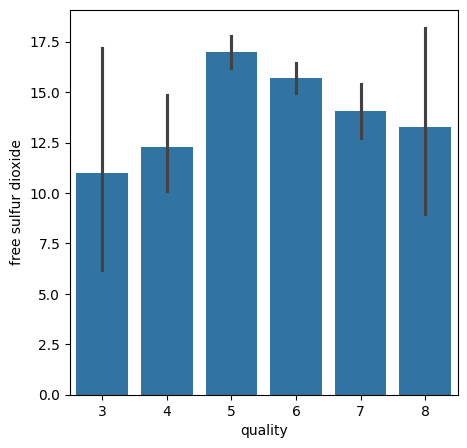

In [ ]:
# free sulfur dioxide and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'free sulfur dioxide',data = wine_data)

<Axes: xlabel='quality', ylabel='chlorides'>

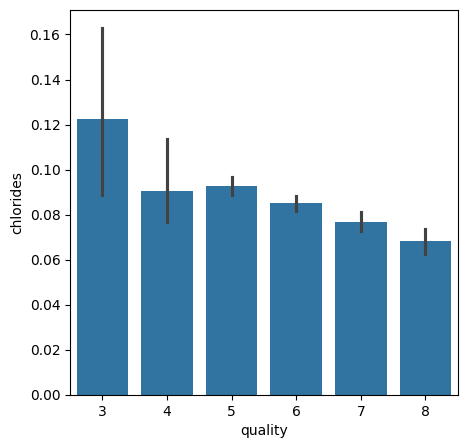

In [ ]:
# chlorides and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'chlorides' , data = wine_data)


# inversely praportional

<Axes: xlabel='quality', ylabel='residual sugar'>

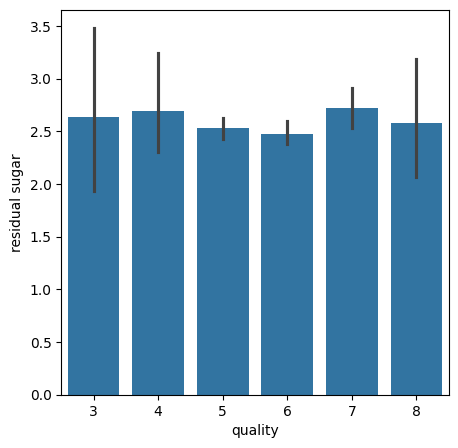

In [ ]:
# residual sugar and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'residual sugar' , data = wine_data)

correlation

In [ ]:
correlation = wine_data.corr()

<Axes: >

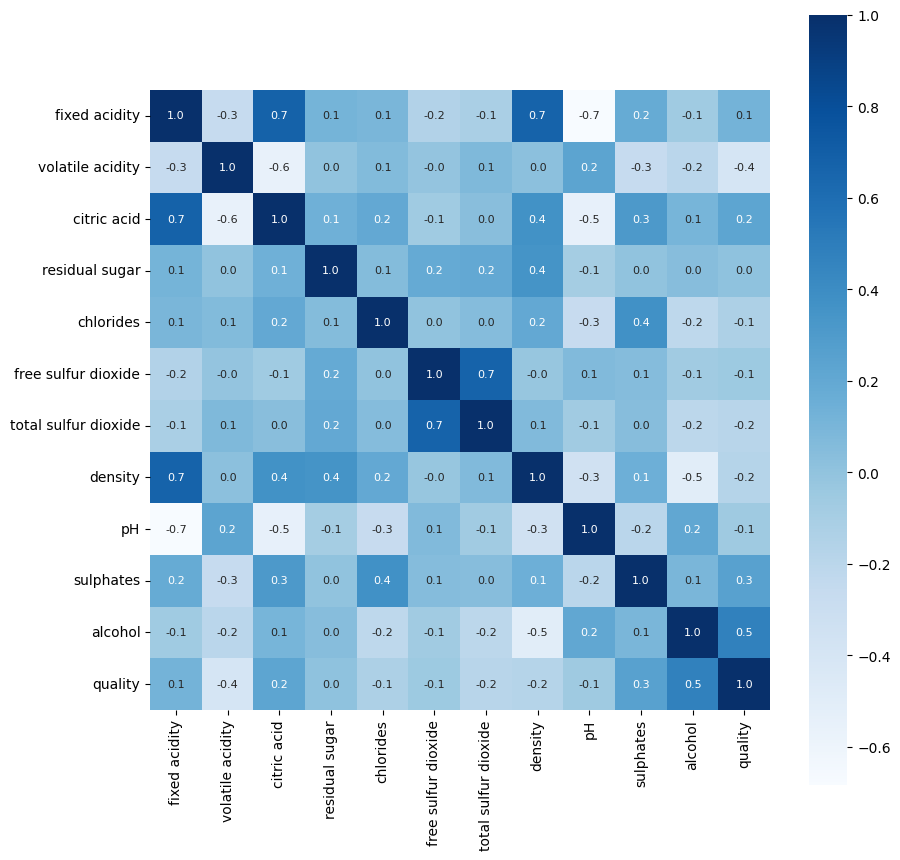

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True, square = True , fmt ='.1f',annot = True,annot_kws ={'size':8},cmap = 'Blues')

Data Preprocessing

In [ ]:
# separating the data and label
features = wine_data.drop(columns = 'quality',axis = 1)
label = wine_data['quality'];

In [ ]:
print(features)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
print(label)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


Label Binarization

In [ ]:
# making changes in quality column
# replacing the value which are >=7 with 0 and left with 1

label  = label.apply(lambda y_value : 1 if y_value >=7 else 0)
print(label)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size = 0.2,random_state = 2)

In [ ]:
print(label.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training :

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on test data
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print(test_data_accuracy)

0.93125


In [ ]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction,Y_train)
print(training_data_accuracy)

1.0


**Building a Predictive system**

In [ ]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data into numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the data as we are predicting the label only one instance

input_data_reshape = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
